In [6]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
from scipy.stats import ttest_ind
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

os.getcwd()
os.chdir("D:/YEAR 3/Semester 1/FIT3163")

calender = pd.read_csv("calendar.csv")
validation = pd.read_csv("sales_train_validation.csv")
evaluation = pd.read_csv("sales_train_evaluation.csv")
price = pd.read_csv("sell_prices.csv")


In [7]:
evaluation['cat_id'].unique()

calender['date'] = pd.to_datetime(calender['date'])

In [8]:
price.shape
max_price = price['sell_price'].max()
min_price = price['sell_price'].min()
price.describe()
price.sort_values('sell_price')
max_index = price['sell_price'].idxmax()
min_index = price['sell_price'].idxmin()
max_store = price.loc[max_index, 'store_id']
min_store = price.loc[min_index, 'store_id']
max_item = price.loc[max_index, 'item_id']
min_item = price.loc[min_index, 'item_id']
price.loc[max_index, 'wm_yr_wk']
price.loc[min_index, 'wm_yr_wk']

11442

In [9]:
max_store_character = str(max_store)
min_store_character = str(min_store)
print("The highest price in the data is: USD", max_price, "at", max_store_character)
print("The lowest price in the data is: USD", min_price, "at", min_store_character)

The highest price in the data is: USD 107.32 at WI_3
The lowest price in the data is: USD 0.01 at CA_1


In [10]:
hobbies = evaluation[evaluation['cat_id'] == "HOBBIES"]
household = evaluation[evaluation['cat_id'] == "HOUSEHOLD"]
foods = evaluation[evaluation['cat_id'] == "FOODS"]


In [11]:

hobbies['sum_unit_sold'] = hobbies.iloc[:, 7:1947].sum(axis=1)
household['sum_unit_sold'] = household.iloc[:, 7:1947].sum(axis=1)
foods['sum_unit_sold'] = foods.iloc[:, 7:1947].sum(axis=1)


C:\Users\hp\AppData\Local\Temp\ipykernel_18328\1876086217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hobbies['sum_unit_sold'] = hobbies.iloc[:, 7:1947].sum(axis=1)
C:\Users\hp\AppData\Local\Temp\ipykernel_18328\1876086217.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  household['sum_unit_sold'] = household.iloc[:, 7:1947].sum(axis=1)
C:\Users\hp\AppData\Local\Temp\ipykernel_18328\1876086217.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [12]:
hobbies_price = price[price.apply(lambda row: 'HOBBIES' in ','.join(row.values.astype(str)), axis=1)]
household_price = price[price.apply(lambda row: 'HOUSEHOLD' in ','.join(row.values.astype(str)), axis=1)]
foods_price = price[price.apply(lambda row: 'FOODS' in ','.join(row.values.astype(str)), axis=1)]


In [13]:
hobbies.shape
household.shape
foods.shape
hobbies_price.shape
household_price.shape
foods_price.shape


(3181789, 4)

In [14]:
hobbies_clean = hobbies.drop_duplicates()
hobbies_clean = hobbies_clean.dropna()
household_clean = household.drop_duplicates()
household_clean = household_clean.dropna()
foods_clean = foods.drop_duplicates()
foods_clean = foods_clean.dropna()
hobbies_price_clean = hobbies_price.drop_duplicates()
hobbies_price_clean = hobbies_price_clean.dropna()
household_price_clean = household_price.drop_duplicates()
household_price_clean = household_price_clean.dropna()
foods_price_clean = foods_price.drop_duplicates()
foods_price_clean = foods_price_clean.dropna()

In [15]:
hobbies_clean.shape
household_clean.shape
foods_clean.shape
hobbies_price_clean.shape
household_price_clean.shape
foods_price_clean.shape

(3181789, 4)

In [17]:
ttest_ind(hobbies_price['sell_price'], household_price['sell_price'])
ttest_ind(hobbies_price['sell_price'], foods_price['sell_price'])
ttest_ind(household_price['sell_price'], foods_price['sell_price'])

ttest_ind(hobbies['sum_unit_sold'], household['sum_unit_sold'])
ttest_ind(hobbies['sum_unit_sold'], foods['sum_unit_sold'])
ttest_ind(household['sum_unit_sold'], foods['sum_unit_sold'])


Ttest_indResult(statistic=-24.44246864317065, pvalue=2.1022064278019526e-130)

In [18]:

hobbies_list = hobbies_price['item_id'].unique()
for i in hobbies_list:
    print("Mean", i, "=", hobbies_price[hobbies_price['item_id'] == i]['sell_price'].mean())

np.random.seed(3163)

n = 5000


Mean HOBBIES_1_001 = 8.298075916230458
Mean HOBBIES_1_002 = 3.9674586244942054
Mean HOBBIES_1_003 = 2.9657334450963253
Mean HOBBIES_1_004 = 4.50284488920655
Mean HOBBIES_1_005 = 2.880902255639004
Mean HOBBIES_1_006 = 1.0017207207207168
Mean HOBBIES_1_007 = 7.8802291978073855
Mean HOBBIES_1_008 = 0.47589706415368965
Mean HOBBIES_1_009 = 1.7224760853569432
Mean HOBBIES_1_010 = 2.9746808510638942
Mean HOBBIES_1_011 = 3.4799999999998104
Mean HOBBIES_1_012 = 6.472092940759459
Mean HOBBIES_1_013 = 1.9699999999999223
Mean HOBBIES_1_014 = 1.0081158238173056
Mean HOBBIES_1_015 = 0.707894923677697
Mean HOBBIES_1_016 = 0.7095616241466286
Mean HOBBIES_1_017 = 1.9473613251155402
Mean HOBBIES_1_018 = 11.821699463327533
Mean HOBBIES_1_019 = 0.4718666666666764
Mean HOBBIES_1_020 = 12.193680781758978
Mean HOBBIES_1_021 = 11.813631386861674
Mean HOBBIES_1_022 = 7.14141489361715
Mean HOBBIES_1_023 = 3.4228581560282763
Mean HOBBIES_1_024 = 8.864651837523933
Mean HOBBIES_1_025 = 3.893988483684991
Mean HOBB

In [19]:

sampled_hobbies = hobbies.sample(n)
sampled_household = household.sample(n)
sampled_foods = foods.sample(n, replace=False)

In [20]:
hobbies_merge = pd.merge(hobbies_price, calender, on="wm_yr_wk")
household_merge = pd.merge(household_price, calender, on="wm_yr_wk")
foods_merge = pd.merge(foods_price, calender, on="wm_yr_wk")
m = 5000

In [21]:
hobbies_merge_sampling = hobbies_merge.sample(m, replace=False)

household_merge_sampling = household_merge.sample(m, replace=False)

foods_merge_sampling = foods_merge.sample(m, replace=False)
hobbies_merge = pd.merge(sampled_hobbies, hobbies_merge_sampling, on="item_id")
household_merge = pd.merge(sampled_household, household_merge_sampling, on="item_id")
foods_merge = pd.merge(sampled_foods, foods_merge_sampling, on="item_id")
x = np.arange(min(hobbies_merge["sell_price"]), max(hobbies_merge["sell_price"]), 1)
y = hobbies_merge["sum_unit_sold"]

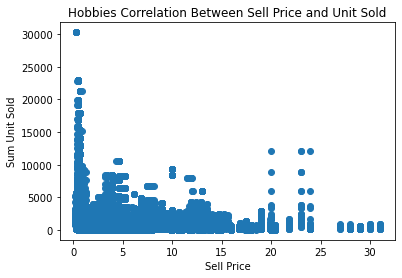

In [29]:
plt.scatter(hobbies_merge["sell_price"], hobbies_merge["sum_unit_sold"])
plt.title("Hobbies Correlation Between Sell Price and Unit Sold")
plt.xlabel("Sell Price")
plt.ylabel("Sum Unit Sold")
plt.show()

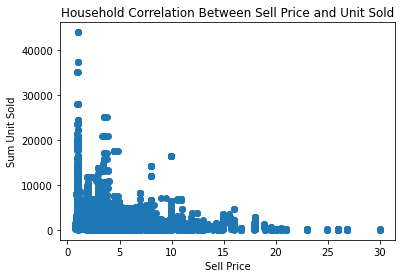

In [28]:


plt.scatter(household_merge["sell_price"], household_merge["sum_unit_sold"])
plt.title("Household Correlation Between Sell Price and Unit Sold")
plt.xlabel("Sell Price")
plt.ylabel("Sum Unit Sold")
plt.show()

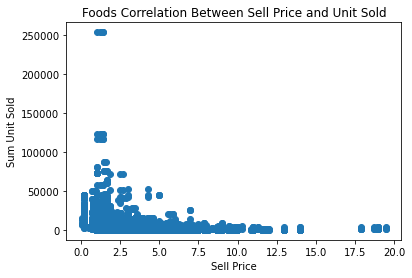

In [27]:
plt.scatter(foods_merge["sell_price"], foods_merge["sum_unit_sold"])
plt.title("Foods Correlation Between Sell Price and Unit Sold")
plt.xlabel("Sell Price")
plt.ylabel("Sum Unit Sold")
plt.show()

In [25]:


hobbies_total_sales = hobbies_merge["sum_unit_sold"] * hobbies_merge["sell_price"]
hobbies_merge["sales"] = hobbies_total_sales
household_total_sales = household_merge["sum_unit_sold"] * household_merge["sell_price"]
household_merge["sales"] = household_total_sales
foods_total_sales = foods_merge["sum_unit_sold"] * foods_merge["sell_price"]
foods_merge["sales"] = foods_total_sales

hobbies_viz = hobbies_merge[["state_id", "dept_id", "cat_id", "sell_price", "sales", "sum_unit_sold", "date"]]
household_viz = household_merge[["state_id", "dept_id", "cat_id", "sell_price", "sales", "sum_unit_sold", "date"]]
foods_viz = foods_merge[["state_id", "dept_id", "cat_id", "sell_price", "sales", "sum_unit_sold", "date"]]
my_data = pd.concat([hobbies_viz, household_viz, foods_viz])
my_data.columns = ["state_id", "dept_id", "cat_id", "sell_price", "revenue", "sales_volume", "date"]



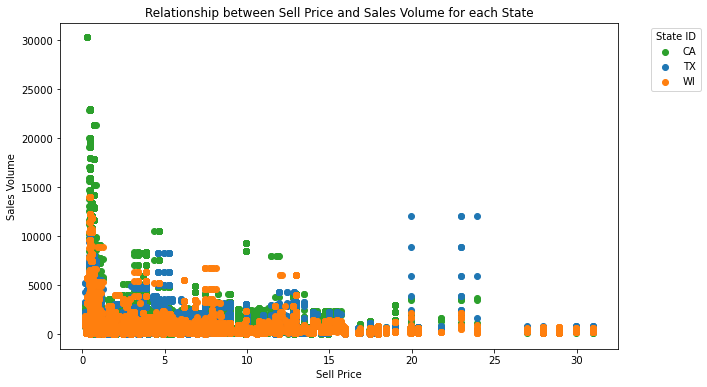

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Define a list of colors for states
colors = list(mcolors.TABLEAU_COLORS.keys())

# Map state_id to colors
color_map = {state_id: colors[i % len(colors)] for i, state_id in enumerate(hobbies_merge['state_id'].unique())}

# Create a scatter plot with different colors for each state
plt.figure(figsize=(10, 6))
for state_id, group in hobbies_merge.groupby('state_id'):
    plt.scatter(group['sell_price'], group['sum_unit_sold'], label=state_id, color=color_map[state_id])

plt.title("Relationship between Sell Price and Sales Volume for each State")
plt.xlabel("Sell Price")
plt.ylabel("Sales Volume")
plt.legend(title='State ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()




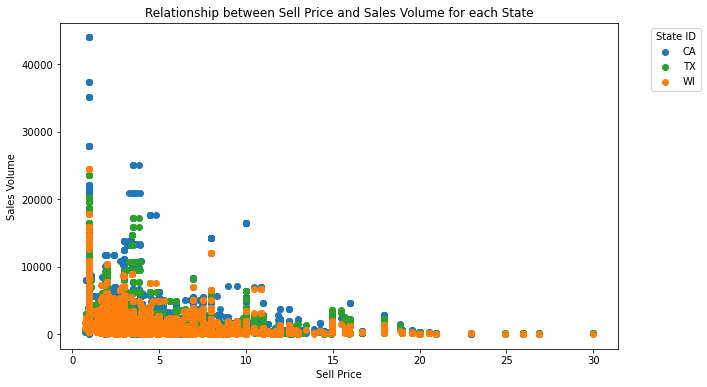

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Define a list of colors for states
colors = list(mcolors.TABLEAU_COLORS.keys())

# Map state_id to colors
color_map = {state_id: colors[i % len(colors)] for i, state_id in enumerate(household_merge['state_id'].unique())}

# Create a scatter plot with different colors for each state
plt.figure(figsize=(10, 6))
for state_id, group in household_merge.groupby('state_id'):
    plt.scatter(group['sell_price'], group['sum_unit_sold'], label=state_id, color=color_map[state_id])

plt.title("Relationship between Sell Price and Sales Volume for each State")
plt.xlabel("Sell Price")
plt.ylabel("Sales Volume")
plt.legend(title='State ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


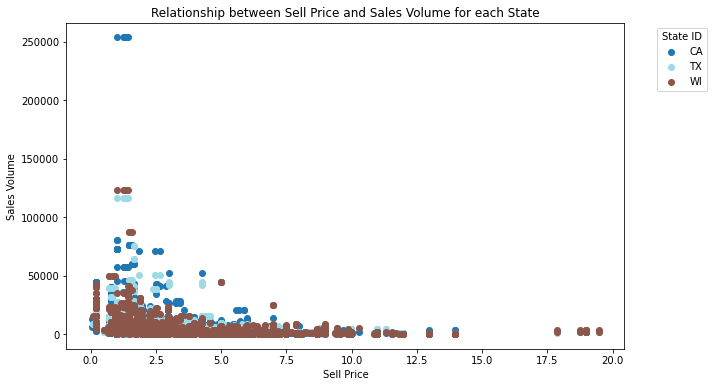

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Get unique state_ids and assign a color to each
state_ids = foods_merge['state_id'].unique()
num_states = len(state_ids)
colors = plt.cm.get_cmap('tab20', num_states)

# Map state_id to color
state_color_map = {state_id: colors(i) for i, state_id in enumerate(state_ids)}

# Create a scatter plot with different colors for each state
plt.figure(figsize=(10, 6))
for state_id, group in foods_merge.groupby('state_id'):
    plt.scatter(group['sell_price'], group['sum_unit_sold'], label=state_id, color=state_color_map[state_id])

plt.title("Relationship between Sell Price and Sales Volume for each State")
plt.xlabel("Sell Price")
plt.ylabel("Sales Volume")
plt.legend(title='State ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


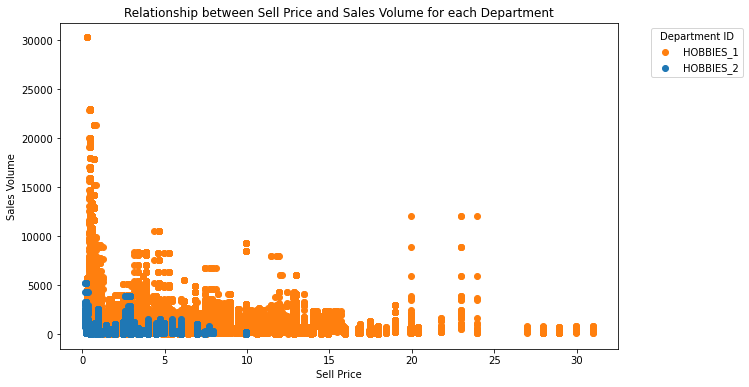

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Define a list of colors for departments
colors = list(mcolors.TABLEAU_COLORS.keys())

# Map dept_id to colors
color_map = {dept_id: colors[i % len(colors)] for i, dept_id in enumerate(hobbies_merge['dept_id'].unique())}

# Create a scatter plot with different colors for each department
plt.figure(figsize=(10, 6))
for dept_id, group in hobbies_merge.groupby('dept_id'):
    plt.scatter(group['sell_price'], group['sum_unit_sold'], label=dept_id, color=color_map[dept_id])

plt.title("Relationship between Sell Price and Sales Volume for each Department")
plt.xlabel("Sell Price")
plt.ylabel("Sales Volume")
plt.legend(title='Department ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


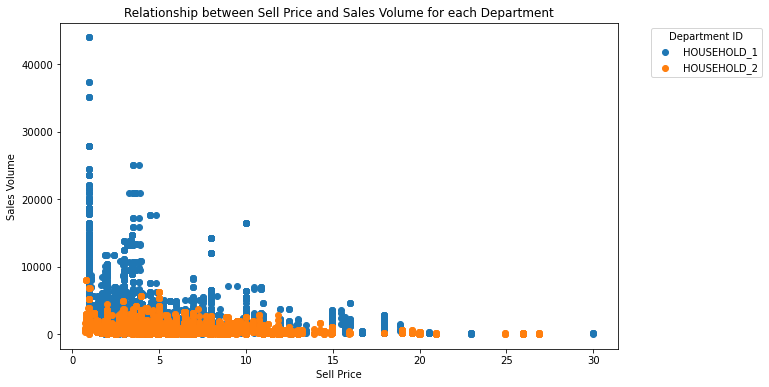

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Define a list of colors for departments
colors = list(mcolors.TABLEAU_COLORS.keys())

# Map dept_id to colors
color_map = {dept_id: colors[i % len(colors)] for i, dept_id in enumerate(household_merge['dept_id'].unique())}

# Create a scatter plot with different colors for each department
plt.figure(figsize=(10, 6))
for dept_id, group in household_merge.groupby('dept_id'):
    plt.scatter(group['sell_price'], group['sum_unit_sold'], label=dept_id, color=color_map[dept_id])

plt.title("Relationship between Sell Price and Sales Volume for each Department")
plt.xlabel("Sell Price")
plt.ylabel("Sales Volume")
plt.legend(title='Department ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



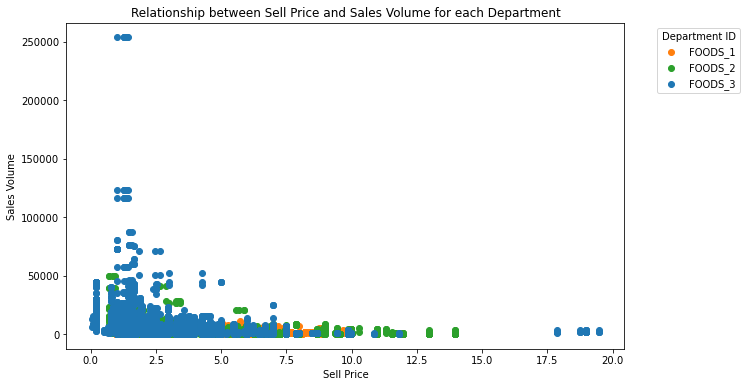

In [44]:

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Define a list of colors for departments
colors = list(mcolors.TABLEAU_COLORS.keys())

# Map dept_id to colors
color_map = {dept_id: colors[i % len(colors)] for i, dept_id in enumerate(foods_merge['dept_id'].unique())}

# Create a scatter plot with different colors for each department
plt.figure(figsize=(10, 6))
for dept_id, group in foods_merge.groupby('dept_id'):
    plt.scatter(group['sell_price'], group['sum_unit_sold'], label=dept_id, color=color_map[dept_id])

plt.title("Relationship between Sell Price and Sales Volume for each Department")
plt.xlabel("Sell Price")
plt.ylabel("Sales Volume")
plt.legend(title='Department ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


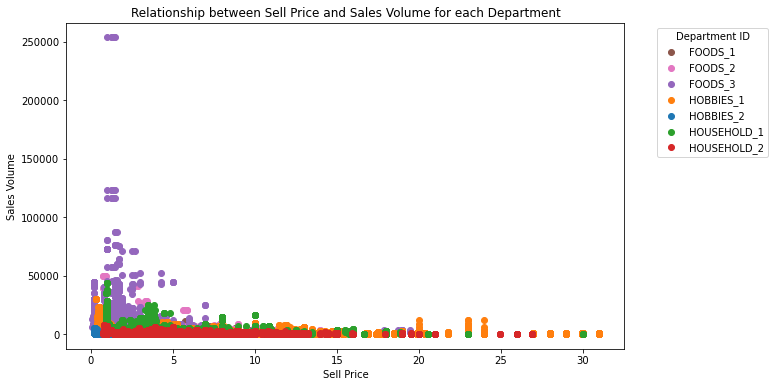

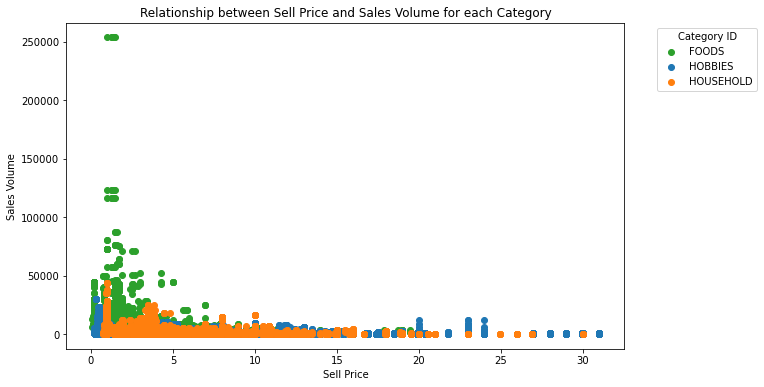

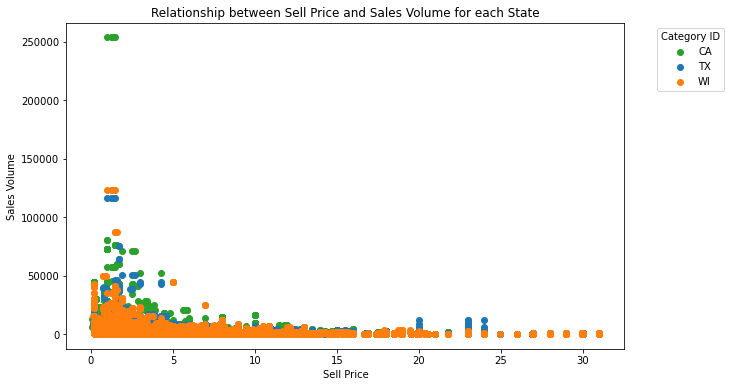

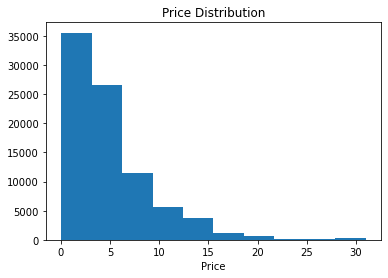

In [54]:

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Define a list of colors for departments
colors = list(mcolors.TABLEAU_COLORS.keys())

# Map dept_id to colors
color_map = {dept_id: colors[i % len(colors)] for i, dept_id in enumerate(my_data['dept_id'].unique())}

# Create a scatter plot with different colors for each department
plt.figure(figsize=(10, 6))
for dept_id, group in my_data.groupby('dept_id'):
    plt.scatter(group['sell_price'], group['sales_volume'], label=dept_id, color=color_map[dept_id])

plt.title("Relationship between Sell Price and Sales Volume for each Department")
plt.xlabel("Sell Price")
plt.ylabel("Sales Volume")
plt.legend(title='Department ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



# Define a list of colors for category
colors = list(mcolors.TABLEAU_COLORS.keys())

# Map cat_id to colors
color_map = {cat_id: colors[i % len(colors)] for i, cat_id in enumerate(my_data['cat_id'].unique())}

# Create a scatter plot with different colors for each category
plt.figure(figsize=(10, 6))
for cat_id, group in my_data.groupby('cat_id'):
    plt.scatter(group['sell_price'], group['sales_volume'], label=cat_id, color=color_map[cat_id])

plt.title("Relationship between Sell Price and Sales Volume for each Category")
plt.xlabel("Sell Price")
plt.ylabel("Sales Volume")
plt.legend(title='Category ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Define a list of colors for state
colors = list(mcolors.TABLEAU_COLORS.keys())

# Map cat_id to colors
color_map = {state_id: colors[i % len(colors)] for i, state_id in enumerate(my_data['state_id'].unique())}

# Create a scatter plot with different colors for each state
plt.figure(figsize=(10, 6))
for state_id, group in my_data.groupby('state_id'):
    plt.scatter(group['sell_price'], group['sales_volume'], label=state_id, color=color_map[state_id])

plt.title("Relationship between Sell Price and Sales Volume for each State")
plt.xlabel("Sell Price")
plt.ylabel("Sales Volume")
plt.legend(title='Category ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Summary statistics of my_data
my_data.describe()

# Histogram of Price Distribution
plt.hist(my_data['sell_price'])
plt.xlabel("Price")
plt.title("Price Distribution")
plt.show()



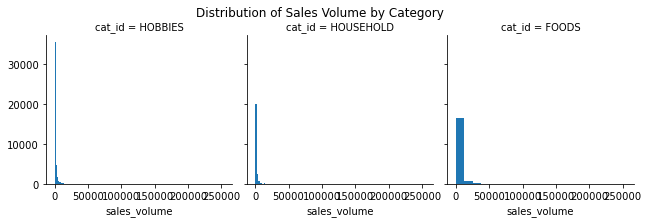

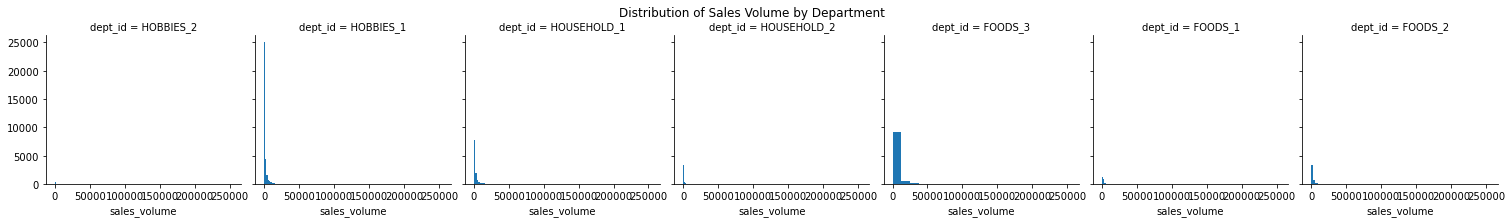

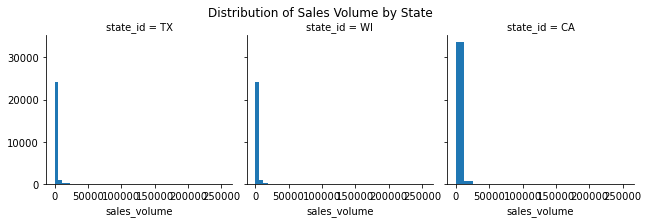

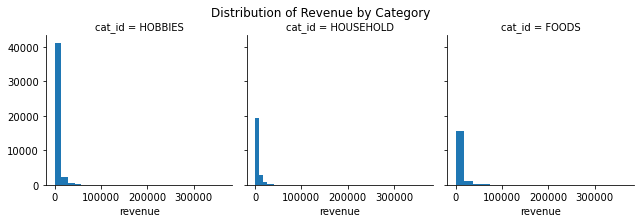

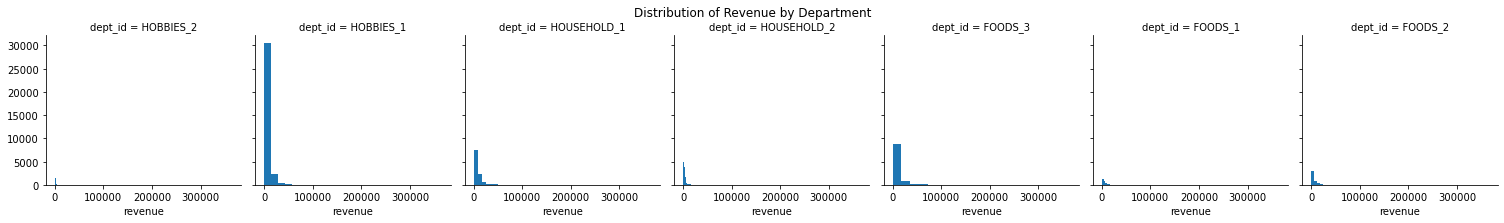

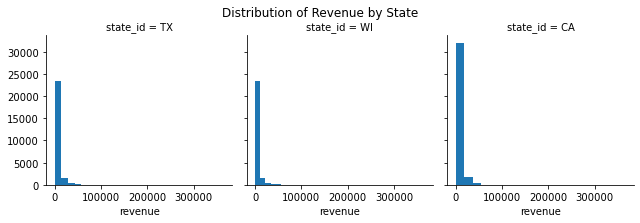

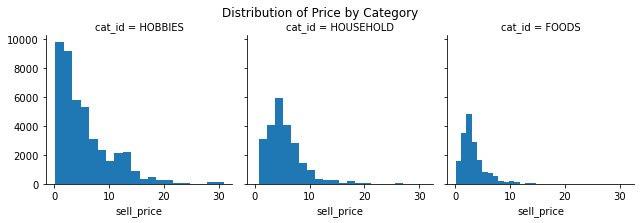

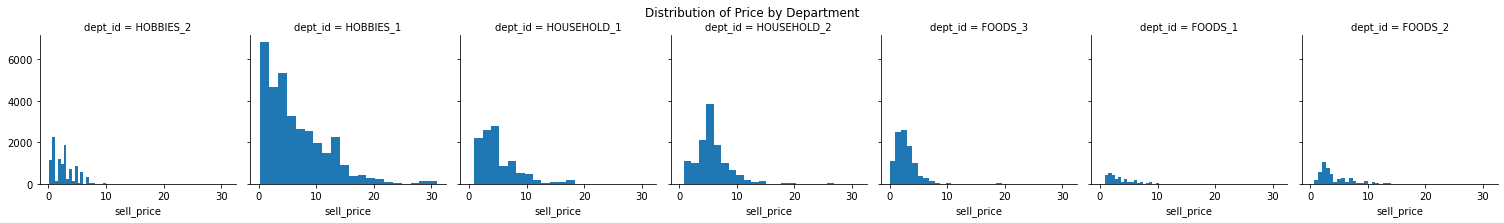

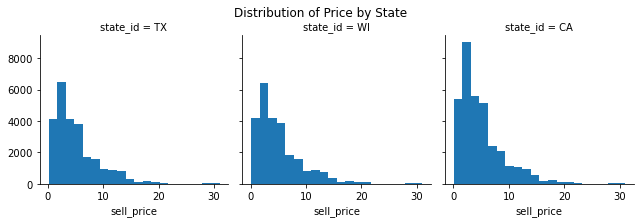

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Sales Volume by Category
g = sns.FacetGrid(my_data, col="cat_id")
g.map(plt.hist, "sales_volume", bins=20)
g.fig.suptitle("Distribution of Sales Volume by Category", y=1.02)

# Distribution of Sales Volume by Department
g = sns.FacetGrid(my_data, col="dept_id")
g.map(plt.hist, "sales_volume", bins=20)
g.fig.suptitle("Distribution of Sales Volume by Department", y=1.02)

# Distribution of Sales Volume by State
g = sns.FacetGrid(my_data, col="state_id")
g.map(plt.hist, "sales_volume", bins=20)
g.fig.suptitle("Distribution of Sales Volume by State", y=1.02)

# Distribution of Revenue by Category
g = sns.FacetGrid(my_data, col="cat_id")
g.map(plt.hist, "revenue", bins=20)
g.fig.suptitle("Distribution of Revenue by Category", y=1.02)

# Distribution of Revenue by Department
g = sns.FacetGrid(my_data, col="dept_id")
g.map(plt.hist, "revenue", bins=20)
g.fig.suptitle("Distribution of Revenue by Department", y=1.02)

# Distribution of Revenue by State
g = sns.FacetGrid(my_data, col="state_id")
g.map(plt.hist, "revenue", bins=20)
g.fig.suptitle("Distribution of Revenue by State", y=1.02)

# Distribution of Price by Category
g = sns.FacetGrid(my_data, col="cat_id")
g.map(plt.hist, "sell_price", bins=20)
g.fig.suptitle("Distribution of Price by Category", y=1.02)

# Distribution of Price by Department
g = sns.FacetGrid(my_data, col="dept_id")
g.map(plt.hist, "sell_price", bins=20)
g.fig.suptitle("Distribution of Price by Department", y=1.02)

# Distribution of Price by State
g = sns.FacetGrid(my_data, col="state_id")
g.map(plt.hist, "sell_price", bins=20)
g.fig.suptitle("Distribution of Price by State", y=1.02)

plt.show()


TypeError: the dtypes of parameters x (object) and width (float64) are incompatible

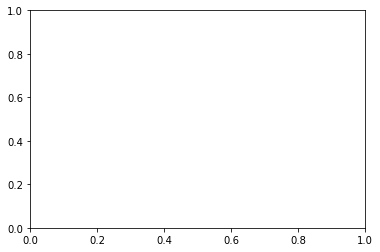

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# max_occasion
max_occasion = hobbies_merge[hobbies_merge['event_type_1'].str.strip() != ''].groupby('event_type_1')['sum_unit_sold'].sum().idxmax()

plt.figure()
plt.bar(hobbies_merge[hobbies_merge['event_type_1'] != '']['event_type_1'], hobbies_merge[hobbies_merge['event_type_1'] != '']['sum_unit_sold'])
plt.title('Occasions with Highest Sales Volume')
plt.xlabel('Occasion')
plt.ylabel('Total Sales Volume')
plt.axvline(x=max_occasion, linestyle='dashed', color='red')

# max_occasion_price
max_occasion_price = hobbies_merge[hobbies_merge['event_type_1'].str.strip() != ''].groupby('event_type_1')['sell_price'].sum().idxmax()

plt.figure()
plt.bar(hobbies_merge[hobbies_merge['event_type_1'] != '']['event_type_1'], hobbies_merge[hobbies_merge['event_type_1'] != '']['sell_price'])
plt.title('Occasion with Highest Price')
plt.xlabel('Occasion')
plt.ylabel('Price')
plt.axvline(x=max_occasion_price, linestyle='dashed', color='red')

# max_occasion_revenue
max_occasion_revenue = hobbies_merge[hobbies_merge['event_type_1'].str.strip() != ''].groupby('event_type_1')['sales'].sum().idxmax()

plt.figure()
plt.bar(hobbies_merge[hobbies_merge['event_type_1'] != '']['event_type_1'], hobbies_merge[hobbies_merge['event_type_1'] != '']['sales'])
plt.title('Occasion with Highest Revenue')
plt.xlabel('Occasion')
plt.ylabel('Total Revenue')
plt.axvline(x=max_occasion_revenue, linestyle='dashed', color='red')

# max_occasion (household_merge)
max_occasion = household_merge[household_merge['event_type_1'].str.strip() != ''].groupby('event_type_1')['sum_unit_sold'].sum().idxmax()

plt.figure()
plt.bar(household_merge[household_merge['event_type_1'] != '']['event_type_1'], household_merge[household_merge['event_type_1'] != '']['sum_unit_sold'])
plt.title('Occasions with Highest Sales Volume (Hobbies)')
plt.xlabel('Occasion')
plt.ylabel('Total Sales Volume')
plt.axvline(x=max_occasion, linestyle='dashed', color='red')

# max_occasion_price (household_merge)
max_occasion_price = household_merge[household_merge['event_type_1'].str.strip() != ''].groupby('event_type_1')['sell_price'].sum().idxmax()

plt.figure()
plt.bar(household_merge[household_merge['event_type_1'] != '']['event_type_1'], household_merge[household_merge['event_type_1'] != '']['sell_price'])
plt.title('Occasion with Highest Price (Hobbies)')
plt.xlabel('Occasion')
plt.ylabel('Price')
plt.axvline(x=max_occasion_price, linestyle='dashed', color='red')

# max_occasion_revenue (household_merge)
max_occasion_revenue = household_merge[household_merge['event_type_1'].str.strip() != ''].groupby('event_type_1')['sales'].sum().idxmax()

plt.figure()
plt.bar(household_merge[household_merge['event_type_1'] != '']['event_type_1'], household_merge[household_merge['event_type_1'] != '']['sales'])
plt.title('Occasion with Highest Revenue (Hobbies)')
plt.xlabel('Occasion')
plt.ylabel('Total Revenue')
plt.axvline(x=max_occasion_revenue, linestyle='dashed', color='red')

# max_occasion (foods_merge)
max_occasion = foods_merge[foods_merge['event_type_1'].str.strip() != ''].groupby('event_type_1')['sum_unit_sold'].sum().idxmax()

plt.figure()
plt.bar(foods_merge[foods_merge['event_type_1'] != '']['event_type_1'], foods_merge[foods_merge['event_type_1'] != '']['sum_unit_sold'])
plt.title('Occasions with Highest Sales Volume (Hobbies)')
plt.xlabel('Occasion')
plt.ylabel('Total Sales Volume')
plt.axvline(x=max_occasion, linestyle='dashed', color='red')

# max_occasion_price (foods_merge)
max_occasion_price = foods_merge[foods_merge['event_type_1'].str.strip() != ''].groupby('event_type_1')['sell_price'].sum().idxmax()

plt.figure()
plt.bar(foods_merge[foods_merge['event_type_1'] != '']['event_type_1'], foods_merge[foods_merge['event_type_1'] != '']['sell_price'])
plt.title('Occasions with Highest Price (Hobbies)')
plt.xlabel('Occasion')
plt.ylabel('Price')
plt.axvline(x=max_occasion_price, linestyle='dashed', color='red')

# max_occasion_revenue (foods_merge)
max_occasion_revenue = foods_merge[foods_merge['event_type_1'].str.strip() != ''].groupby('event_type_1')['sales'].sum().idxmax()

plt.figure()
plt.bar(foods_merge[foods_merge['event_type_1'] != '']['event_type_1'], foods_merge[foods_merge['event_type_1'] != '']['sales'])
plt.title('Occasion with Highest Revenue (Hobbies)')
plt.xlabel('Occasion')
plt.ylabel('Total Revenue')
plt.axvline(x=max_occasion_revenue, linestyle='dashed', color='red')

# average_prices (hobbies_merge)
average_prices = hobbies_merge.groupby('year')['sell_price'].mean().reset_index()

plt.figure()
plt.plot(average_prices['year'], average_prices['sell_price'])
plt.title('Average Price Fluctuation (Hobbies)')
plt.xlabel('Year')
plt.ylabel('Average Sell Price')
plt.xticks(rotation=45, ha='right')

# average_prices (hobbies_merge) by state_id
average_prices = hobbies_merge.groupby(['state_id', 'year'])['sell_price'].mean().reset_index()

plt.figure()
for state_id in average_prices['state_id'].unique():
    plt.plot(average_prices[average_prices['state_id'] == state_id]['year'], average_prices[average_prices['state_id'] == state_id]['sell_price'], label=state_id)
plt.title('Average Price Fluctuation by State (Hobbies)')
plt.xlabel('Year')
plt.ylabel('Average Sell Price')
plt.xticks(rotation=45, ha='right')
plt.legend()

# average_prices (hobbies_merge) by dept_id
average_prices = hobbies_merge.groupby(['dept_id', 'year'])['sell_price'].mean().reset_index()

plt.figure()
for dept_id in average_prices['dept_id'].unique():
    plt.plot(average_prices[average_prices['dept_id'] == dept_id]['year'], average_prices[average_prices['dept_id'] == dept_id]['sell_price'], label=dept_id)
plt.title('Average Price Fluctuation by Department (Hobbies)')
plt.xlabel('Year')
plt.ylabel('Average Sell Price')
plt.xticks(rotation=45, ha='right')
plt.legend()

# average_prices (hobbies_merge) by event_type_1
average_prices = hobbies_merge.groupby(['event_type_1', 'year'])['sell_price'].mean().reset_index()

plt.figure()
for event_type_1 in average_prices['event_type_1'].unique():
    plt.plot(average_prices[average_prices['event_type_1'] == event_type_1]['year'], average_prices[average_prices['event_type_1'] == event_type_1]['sell_price'], label=event_type_1)
plt.title('Average Price Fluctuation by Event Type (Hobbies)')
plt.xlabel('Year')
plt.ylabel('Average Sell Price')
plt.xticks(rotation=45, ha='right')
plt.legend()




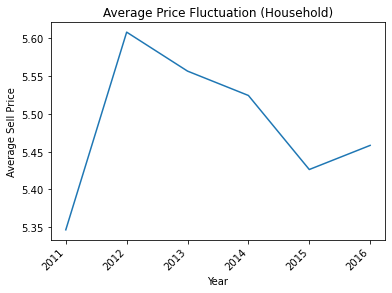

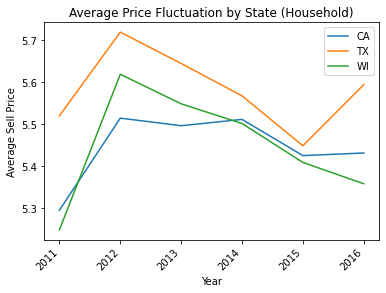

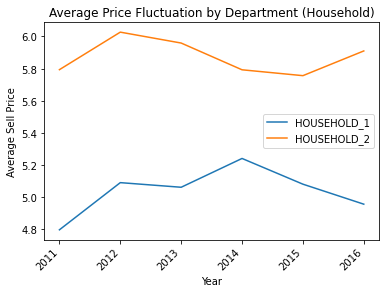

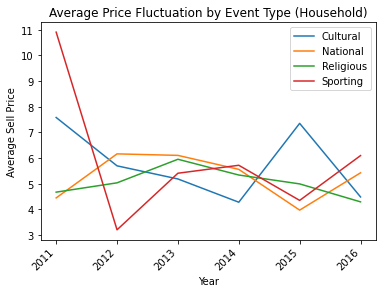

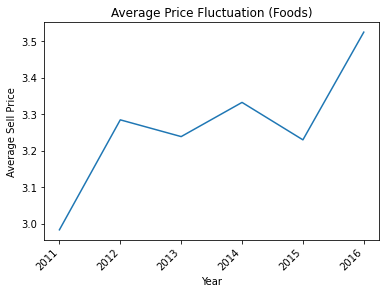

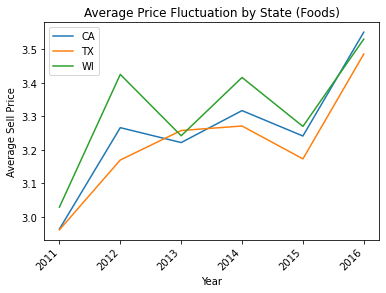

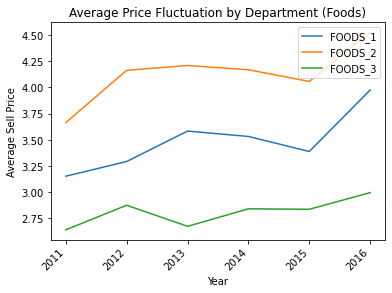

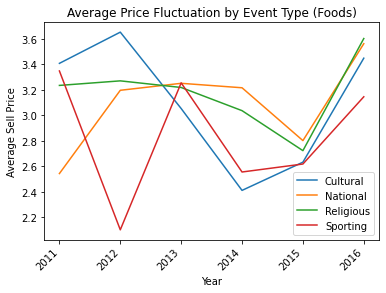

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0        HOBBIES_2
1        HOBBIES_2
2        HOBBIES_2
3        HOBBIES_2
4        HOBBIES_2
           ...    
85257      FOODS_2
85258      FOODS_2
85259      FOODS_2
85260      FOODS_2
85261      FOODS_2
Name: dept_id, Length: 85262, dtype: object

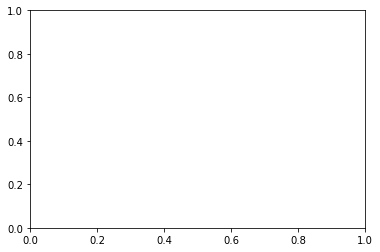

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Average Price Fluctuation (Household)
average_prices = household_merge.groupby('year').agg(avg_sell_price=('sell_price', 'mean')).reset_index()

plt.plot(average_prices['year'], average_prices['avg_sell_price'])
plt.title("Average Price Fluctuation (Household)")
plt.xlabel("Year")
plt.ylabel("Average Sell Price")
plt.xticks(rotation=45, ha='right')
plt.show()

# Average Price Fluctuation by State (Household)
average_prices = household_merge.groupby(['state_id', 'year']).agg(avg_sell_price=('sell_price', 'mean')).reset_index()

for state_id in average_prices['state_id'].unique():
    data = average_prices[average_prices['state_id'] == state_id]
    plt.plot(data['year'], data['avg_sell_price'], label=state_id)

plt.title("Average Price Fluctuation by State (Household)")
plt.xlabel("Year")
plt.ylabel("Average Sell Price")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

# Average Price Fluctuation by Department (Household)
average_prices = household_merge.groupby(['dept_id', 'year']).agg(avg_sell_price=('sell_price', 'mean')).reset_index()

for dept_id in average_prices['dept_id'].unique():
    data = average_prices[average_prices['dept_id'] == dept_id]
    plt.plot(data['year'], data['avg_sell_price'], label=dept_id)

plt.title("Average Price Fluctuation by Department (Household)")
plt.xlabel("Year")
plt.ylabel("Average Sell Price")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

# Average Price Fluctuation by Event Type (Household)
average_prices = household_merge.groupby(['event_type_1', 'year']).agg(avg_sell_price=('sell_price', 'mean')).reset_index()

for event_type_1 in average_prices['event_type_1'].unique():
    data = average_prices[average_prices['event_type_1'] == event_type_1]
    plt.plot(data['year'], data['avg_sell_price'], label=event_type_1)

plt.title("Average Price Fluctuation by Event Type (Household)")
plt.xlabel("Year")
plt.ylabel("Average Sell Price")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

# Average Price Fluctuation (Foods)
average_prices = foods_merge.groupby('year').agg(avg_sell_price=('sell_price', 'mean')).reset_index()

plt.plot(average_prices['year'], average_prices['avg_sell_price'])
plt.title("Average Price Fluctuation (Foods)")
plt.xlabel("Year")
plt.ylabel("Average Sell Price")
plt.xticks(rotation=45, ha='right')
plt.show()

# Average Price Fluctuation by State (Foods)
average_prices = foods_merge.groupby(['state_id', 'year']).agg(avg_sell_price=('sell_price', 'mean')).reset_index()

for state_id in average_prices['state_id'].unique():
    data = average_prices[average_prices['state_id'] == state_id]
    plt.plot(data['year'], data['avg_sell_price'], label=state_id)

plt.title("Average Price Fluctuation by State (Foods)")
plt.xlabel("Year")
plt.ylabel("Average Sell Price")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

# Average Price Fluctuation by Department (Foods)
average_prices = foods_merge.groupby(['dept_id', 'year']).agg(avg_sell_price=('sell_price', 'mean')).reset_index()

for dept_id in average_prices['dept_id'].unique():
    data = average_prices[average_prices['dept_id'] == dept_id]
    plt.plot(data['year'], data['avg_sell_price'], label=dept_id)

plt.title("Average Price Fluctuation by Department (Foods)")
plt.xlabel("Year")
plt.ylabel("Average Sell Price")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

# Average Price Fluctuation by Event Type (Foods)
average_prices = foods_merge.groupby(['event_type_1', 'year']).agg(avg_sell_price=('sell_price', 'mean')).reset_index()

for event_type_1 in average_prices['event_type_1'].unique():
    data = average_prices[average_prices['event_type_1'] == event_type_1]
    plt.plot(data['year'], data['avg_sell_price'], label=event_type_1)

plt.title("Average Price Fluctuation by Event Type (Foods)")
plt.xlabel("Year")
plt.ylabel("Average Sell Price")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

# Average Price vs. Sales Volume
average_price = my_data.groupby('dept_id').agg(avg_price=('sell_price', 'mean')).reset_index()

my_data = pd.merge(my_data, average_price, on='dept_id')

plt.scatter(my_data['avg_price'], my_data['sales_volume'], c=my_data['dept_id'])
plt.title("Average Price vs. Sales Volume")
plt.xlabel("Average Price")
plt.ylabel("Sales Volume")
plt.show()

# Average Price vs. Revenue
plt.scatter(my_data['avg_price'], my_data['revenue'], c=my_data['dept_id'])
plt.title("Average Price vs. Revenue")
plt.xlabel("Average Price")
plt.ylabel("Revenue")
plt.show()

# Average Price vs Total Sales Volume
summary_data = my_data.groupby('dept_id').agg(total_sales_volume=('sales_volume', 'sum'),
                                              total_revenue=('revenue', 'sum'),
                                              avg_price=('sell_price', 'mean')).reset_index()

plt.scatter(summary_data['avg_price'], summary_data['total_sales_volume'], c=summary_data['dept_id'])
plt.title("Average Price vs Total Sales Volume")
plt.xlabel("Average Price")
plt.ylabel("Total Sales Volume")
plt.text(summary_data['avg_price'], summary_data['total_sales_volume'], summary_data['dept_id'], va='bottom', ha='center', size=2.5)
plt.show()

# Average Price vs Total Revenue
plt.scatter(summary_data['avg_price'], summary_data['total_revenue'], c=summary_data['dept_id'])
plt.title("Average Price vs Total Revenue")
plt.xlabel("Average Price")
plt.ylabel("Total Revenue")
plt.text(summary_data['avg_price'], summary_data['total_revenue'], summary_data['dept_id'], va='bottom', ha='center', size=2.5)
plt.show()

# Average Price vs Average Sales Volume
summary_data = my_data.groupby('dept_id').agg(avg_sales_volume=('sales_volume', 'mean'),
                                              avg_revenue=('revenue', 'mean'),
                                              avg_price=('sell_price', 'mean')).reset_index()

plt.scatter(summary_data['avg_price'], summary_data['avg_sales_volume'], c=summary_data['dept_id'])
plt.title("Average Price vs Average Sales Volume")
plt.xlabel("Average Price")
plt.ylabel("Average Sales Volume")
plt.text(summary_data['avg_price'], summary_data['avg_sales_volume'], summary_data['dept_id'], va='bottom', ha='center', size=2.5)
plt.show()

# Average Price vs Average Revenue
plt.scatter(summary_data['avg_price'], summary_data['avg_revenue'], c=summary_data['dept_id'])
plt.title("Average Price vs Average Revenue")
plt.xlabel("Average Price")
plt.ylabel("Average Revenue")
plt.text(summary_data['avg_price'], summary_data['avg_revenue'], summary_data['dept_id'], va='bottom', ha='center', size=2.5)
plt.show()

# Price Elasticity of Demand for Different Category
my_data = my_data.sort_values('date').reset_index(drop=True)
my_data['quantity_change'] = my_data['sales_volume'] / my_data['sales_volume'].shift(1) - 1
my_data['price_change'] = my_data['sell_price'] / my_data['sell_price'].shift(1) - 1

price_elasticity = my_data.groupby('cat_id').agg(price_elasticity=('quantity_change', 'sum') / ('price_change', 'sum')).reset_index()

plt.bar(price_elasticity['cat_id'], price_elasticity['price_elasticity'])
plt.title("Price Elasticity of Demand for Different Category")
plt.xlabel("Product ID")
plt.ylabel("Price Elasticity")
plt.show()

# Price Elasticity of Demand for Different Departments
my_data = my_data.sort_values('date').reset_index(drop=True)
my_data['quantity_change'] = my_data['sales_volume'] / my_data['sales_volume'].shift(1) - 1
my_data['price_change'] = my_data['sell_price'] / my_data['sell_price'].shift(1) - 1

price_elasticity = my_data.groupby('dept_id').agg(price_elasticity=('quantity_change', 'sum') / ('price_change', 'sum')).reset_index()

plt.bar(price_elasticity['dept_id'], price_elasticity['price_elasticity'])
plt.title("Price Elasticity of Demand for Different Departments")
plt.xlabel("Product ID")
plt.ylabel("Price Elasticity")
plt.show()




In [ ]:
import pandas as pd
import statsmodels.api as sm

# Assuming my_data is a pandas DataFrame
my_data = my_data.dropna(subset=['sell_price', 'quantity_change'])

X = my_data[['sell_price']]
y = my_data['quantity_change']
X = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(y, X).fit()
print(model.summary())

price_coefficient = model.params['sell_price']

price_elasticity = price_coefficient * (my_data['sell_price'].mean() / my_data['quantity_change'].mean())

print(f"Price Elasticity of Demand: {price_elasticity}")


X = my_data[['sell_price']]
y = my_data['sales_volume']
X = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(y, X).fit()
print(model.summary())

intercept = model.params['const']
slope = model.params['sell_price']

price_elasticity = -slope * (my_data['sell_price'].mean() / my_data['sales_volume'].mean())

print(f"Price Elasticity of Demand: {price_elasticity}")




In [43]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming my_data is a pandas DataFrame
my_data['quantity_sold'] = my_data['revenue'] / my_data['sell_price']

def calculate_price_elasticity(data):
    if len(data) < 2:
        return np.nan
    
    X = sm.add_constant(data['sell_price'])
    y = data['quantity_sold']
    model = sm.OLS(y, X).fit()
    
    price_coefficient = model.params['sell_price']
    price_elasticity = price_coefficient * (data['sell_price'].mean() / data['quantity_sold'].mean())
    return {'price_elasticity': price_elasticity, 'model': model}

price_elasticity = my_data.groupby('dept_id').apply(calculate_price_elasticity)

price_elasticity_df = pd.DataFrame({
    'dept_id': [x for x in price_elasticity.index],
    'price_elasticity': [x['price_elasticity'] for x in price_elasticity]
})

print(price_elasticity_df)

my_data['revenue_elasticity'] = my_data['price_change'] * my_data['avg_price']

plt.figure()
plt.scatter(my_data['price_change'], my_data['revenue_elasticity'])
plt.xlabel("Price Change")
plt.ylabel("Revenue Elasticity")
plt.title("Price Elasticity of Revenue")
plt.show()

my_data['sales_volume_elasticity'] = my_data['price_change'] * my_data['avg_price']

plt.figure()
plt.scatter(my_data['price_change'], my_data['sales_volume_elasticity'])
plt.xlabel("Price Change")
plt.ylabel("Sales Volume Elasticity")
plt.title("Price Elasticity of Sales Volume")
plt.show()




       dept_id  price_elasticity
0      FOODS_1         -0.664813
1      FOODS_2         -0.498042
2      FOODS_3         -0.672120
3    HOBBIES_1         -0.628893
4    HOBBIES_2         -0.318025
5  HOUSEHOLD_1         -0.593050
6  HOUSEHOLD_2         -0.505311


KeyError: 'price_change'